<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
import scipy.stats as ss

In [3]:
sns.__version__

'0.9.0'

In [6]:
dataset = pd.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [7]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [8]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'pf_score', # Personal Freedom (score)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [9]:
dataset[important_cols].head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.596281,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,5.281772,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,6.111324,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,8.099696,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,6.912804,7.57,29.0,7.241402,57.0


In [10]:
data = dataset[important_cols]

## 1. Estadísticos descriptivos

### 1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [338]:
data.shape

(1458, 17)

In [11]:
data.describe()

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,ef_score,ef_rank,hf_score,hf_rank
count,1458.000000,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180,7.201278,6.785610,76.973149,6.993444,77.007983
std,2.582875,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473,1.374947,0.883601,44.540142,1.025811,44.506549
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.166555,2.880000,1.000000,3.765827,1.000000
25%,2010.000000,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.197388,6.250000,38.000000,6.336685,39.000000
50%,2012.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667,7.189009,6.900000,77.000000,6.923840,76.000000
75%,2014.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.449475,7.410000,115.000000,7.894660,115.000000
max,2016.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.568154,9.190000,162.000000,9.126313,162.000000


In [13]:
data_range = data.describe().loc[['min','max']]
data_range.loc['range'] = data_range.loc['max'] - data_range.loc['min']
data_range.T

,min,max,range
year,2008.000000,2016.000000,8.000000
pf_identity_legal,0.000000,10.000000,10.000000
pf_identity_parental_marriage,0.000000,10.000000,10.000000
pf_identity_parental_divorce,0.000000,10.000000,10.000000
pf_identity_parental,0.000000,10.000000,10.000000
pf_identity_sex_male,0.000000,10.000000,10.000000
pf_identity_sex_female,0.000000,10.000000,10.000000
pf_identity_sex,0.000000,10.000000,10.000000
pf_identity_divorce,0.000000,10.000000,10.000000
pf_identity,0.000000,10.000000,10.000000


### 2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [18]:
data['is_latam'] = (data.region == 'Latin America & the Caribbean')
features = ['pf_identity','hf_score']


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Adicionamos una variable auxiliar que nos va a permitir filtrar facilmente las entradas pertenecientes a la region de Latinoamerica y el Caribe

In [342]:
pd.concat([data[features].mean(),data[data.is_latam][features].mean()],axis=1).rename(columns={0:'global mean',1:'latam mean'})

,global mean,latam mean
pf_identity,7.334180,8.765086
hf_score,6.993444,7.047982


In [19]:
pd.concat([data[features].median(),data[data.is_latam][features].mean()],axis=1).rename(columns={0:'global median',1:'latam median'})

,global median,latam median
pf_identity,9.166667,8.765086
hf_score,6.923840,7.047982


In [20]:
pd.concat([data[features].std(),data[data.is_latam][features].mean()],axis=1).rename(columns={0:'global std_dev',1:'latam std_dev'})

,global std_dev,latam std_dev
pf_identity,3.159473,8.765086
hf_score,1.025811,7.047982


### 3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?

Los valores son comparables en el sentido que ambos son puntajes con una escala del 0 al 10.
El valor hf_score es el promedio entre el porcentage de libertad personal con el porcentage de libertad economica. Por lo cual esta influenciado por todas las variables dentro del dataset.

 ### 4. ¿Cómo pueden sanearse los valores faltantes?

Existen diferentes formas de sanear los valores faltantes, la forma mas sencilla es simplemente desechar los datos que posean valores faltantes. Claro que esta provocara la reduccion del dataset lo cual debe ser considerado.
Otra estrategia recurrente es la de reemplazar los valores faltantes con la media o mediana de la variable, de esta forma mantenemos todas las muestras pero obviamente inducimos un error. 
Para reducir este error podemos afinar el valor con el cual reemplazamos los valores faltantes, en este caso en particular por ejemplo en lugar de usar la mediana general, podriamos usar la mediana de la region donde se encuentre el pais en cuestion.

Verifiquemos la cantidad de valores faltantes que poseemos en las variables pf_identity y hf_score

In [26]:
sum(data.pf_identity.isnull())

80

In [346]:
sum(data.hf_score.isnull())

80

Tenemos 80 faltantes en cada una de las categorias. Lo cual resulta extraño. Vamos a revisar si son las mismas entradas en las cuales hf_score y pf_identity son nulas.

In [30]:
sum(data.pf_identity.isnull() != data.hf_score.isnull())

0

In [348]:
data[data.pf_identity.isnull()].head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank,is_latam
174,2015,BLR,Belarus,Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
231,2015,IRQ,Iraq,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
298,2015,SDN,Sudan,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
336,2014,BLR,Belarus,Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
393,2014,IRQ,Iraq,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Podemos ver ademas que para esas entradas practicamente todas las variables son nulas.
Por ende determinamos que estos pueden ser retirados del dataset. Retiraremos las muestras donde hf_score es nulo.

In [31]:
data = data[data.hf_score.notna()]

In [350]:
data.shape

(1378, 18)

###  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

Graficamente podemos detectar outliers realizando un boxplot de las variables a analizar. Para eso generamos una version auxiliar de dataset donde fusionamos en una misma columna las variables de interes.

In [43]:
data_melt = pd.melt(data,id_vars=['year','region','countries','is_latam'], value_vars=features, var_name='feature', value_name='score')
data_melt.head()

,year,region,countries,is_latam,feature,score
0,2016,Eastern Europe,Albania,False,pf_identity,6.250000
1,2016,Middle East & North Africa,Algeria,False,pf_identity,0.833333
2,2016,Sub-Saharan Africa,Angola,False,pf_identity,7.500000
3,2016,Latin America & the Caribbean,Argentina,True,pf_identity,10.000000
4,2016,Caucasus & Central Asia,Armenia,False,pf_identity,8.000000


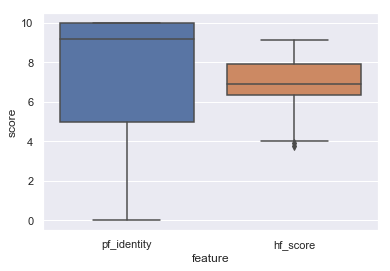

In [522]:
sns.set() #Estilo grafico predeterminado
g = sns.boxplot(data=data_melt, x='feature', y='score')

Podemos ver que el grafico indica que *hf_score* posee algunos outliers en la parte baja de la distribucion

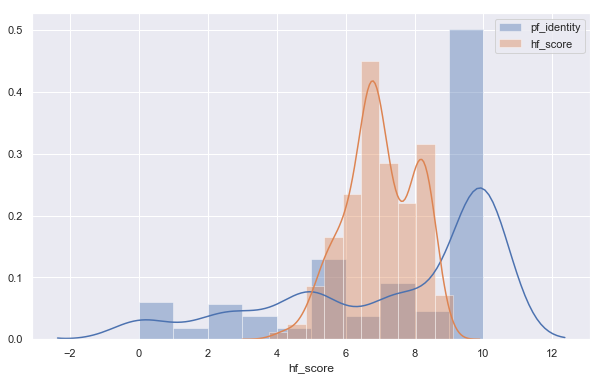

In [521]:
g = plt.figure(figsize=(10,6))
g = sns.distplot(data.pf_identity, bins=10, label='pf_identity')
g = sns.distplot(data.hf_score, bins=10, label='hf_score')
g = plt.legend()

Tambien podemos utilizar criterios analiticos y buscar los outliers matematicamente. 
En este caso utilizaremos dos criterios comunes una utilizar una distancia a la media de 3 desviacion standard y 1.5 * IQR (rango intercuartil)

In [355]:
sum(np.abs(ss.zscore(data.pf_identity)>3))

0

In [356]:
sum(np.abs(ss.zscore(data.hf_score)>3))

0

Bajo el criterio de distancia mayor a 3 desviaciones standard, no hay outliers

In [357]:
Q1 = data.pf_identity.quantile(1/4)
Q3 = data.pf_identity.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (data.pf_identity <= Q1 - 1.5*IQR) | (data.pf_identity >= Q3 + 1.5*IQR)
sum(is_outlier)

0

In [358]:
Q1 = data.hf_score.quantile(1/4)
Q3 = data.hf_score.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (data.hf_score <= Q1 - 1.5*IQR) | (data.hf_score >= Q3 + 1.5*IQR)
sum(is_outlier)

2

Segun el criterio de 1.5 * IQR tenemos 0 outliers en *pf_identity* y 2 en *hf_score* . Que coincide que el criterio usado en el boxplot. Veamos cuales son estos valores.

In [359]:
data[is_outlier]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank,is_latam
141,2016,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.02,157.0,3.765827,162.0,False
303,2015,SYR,Syria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.96,154.0,3.910826,159.0,False


Vemos que el outlier no corresponde a un error en el ingreso de datos sino que realmente representa una situacion extraordinaria, de un pais en guerra con libertades sumamente restringidas.
Por ende no debemos quitarlo del dataset.

## 2. Agregación de datos

### 1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


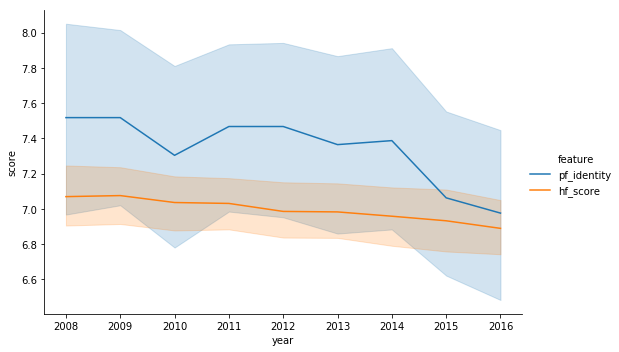

In [44]:
g = sns.relplot(data=data_melt, kind='line', x='year', y='score', hue='feature', height=5, aspect=1.5)

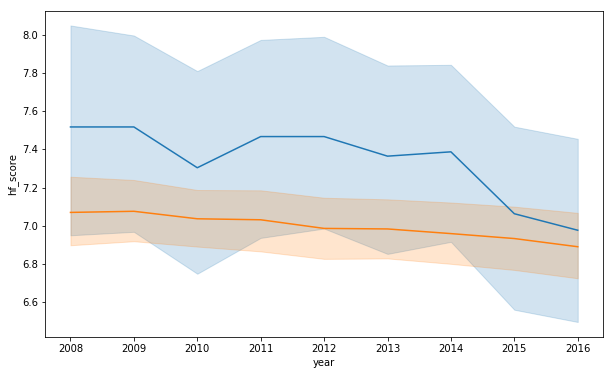

In [45]:
# OTRA FORMA DE GENERAR EL GRAFICO
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='year', y='pf_identity')
sns.lineplot(data=data, x='year', y='hf_score')

### 2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

Grafico Global Vs Latino America

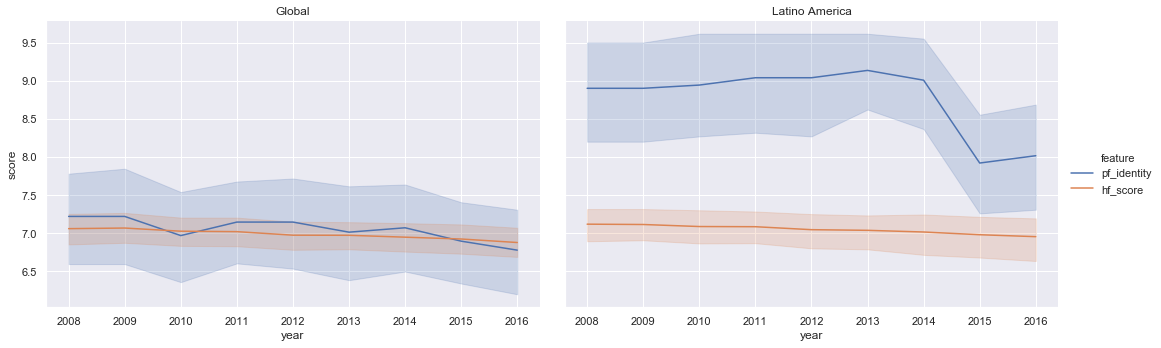

In [362]:
g = sns.relplot(data=data_melt, kind='line', x='year', y='score', hue='feature', col='is_latam', aspect=1.5)
axes = g.axes.flatten()
axes[0].set_title("Global");
axes[1].set_title("Latino America");

Ahora segreguemos aun mas los datos y visualizemos las diferentes regiones

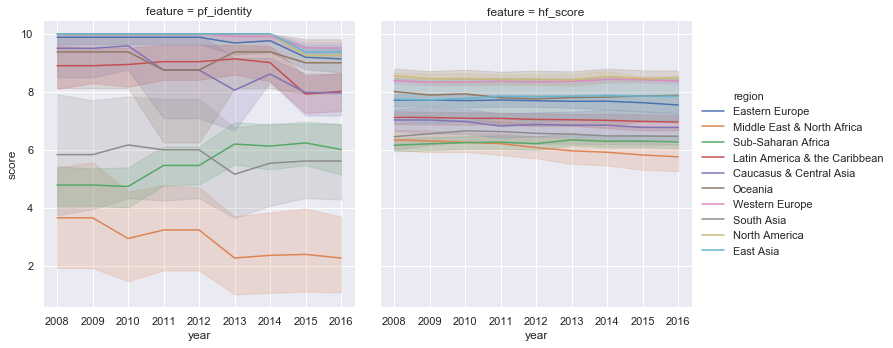

In [363]:
g = sns.relplot(data=data_melt, kind='line', x='year', y='score', hue='region', col='feature')

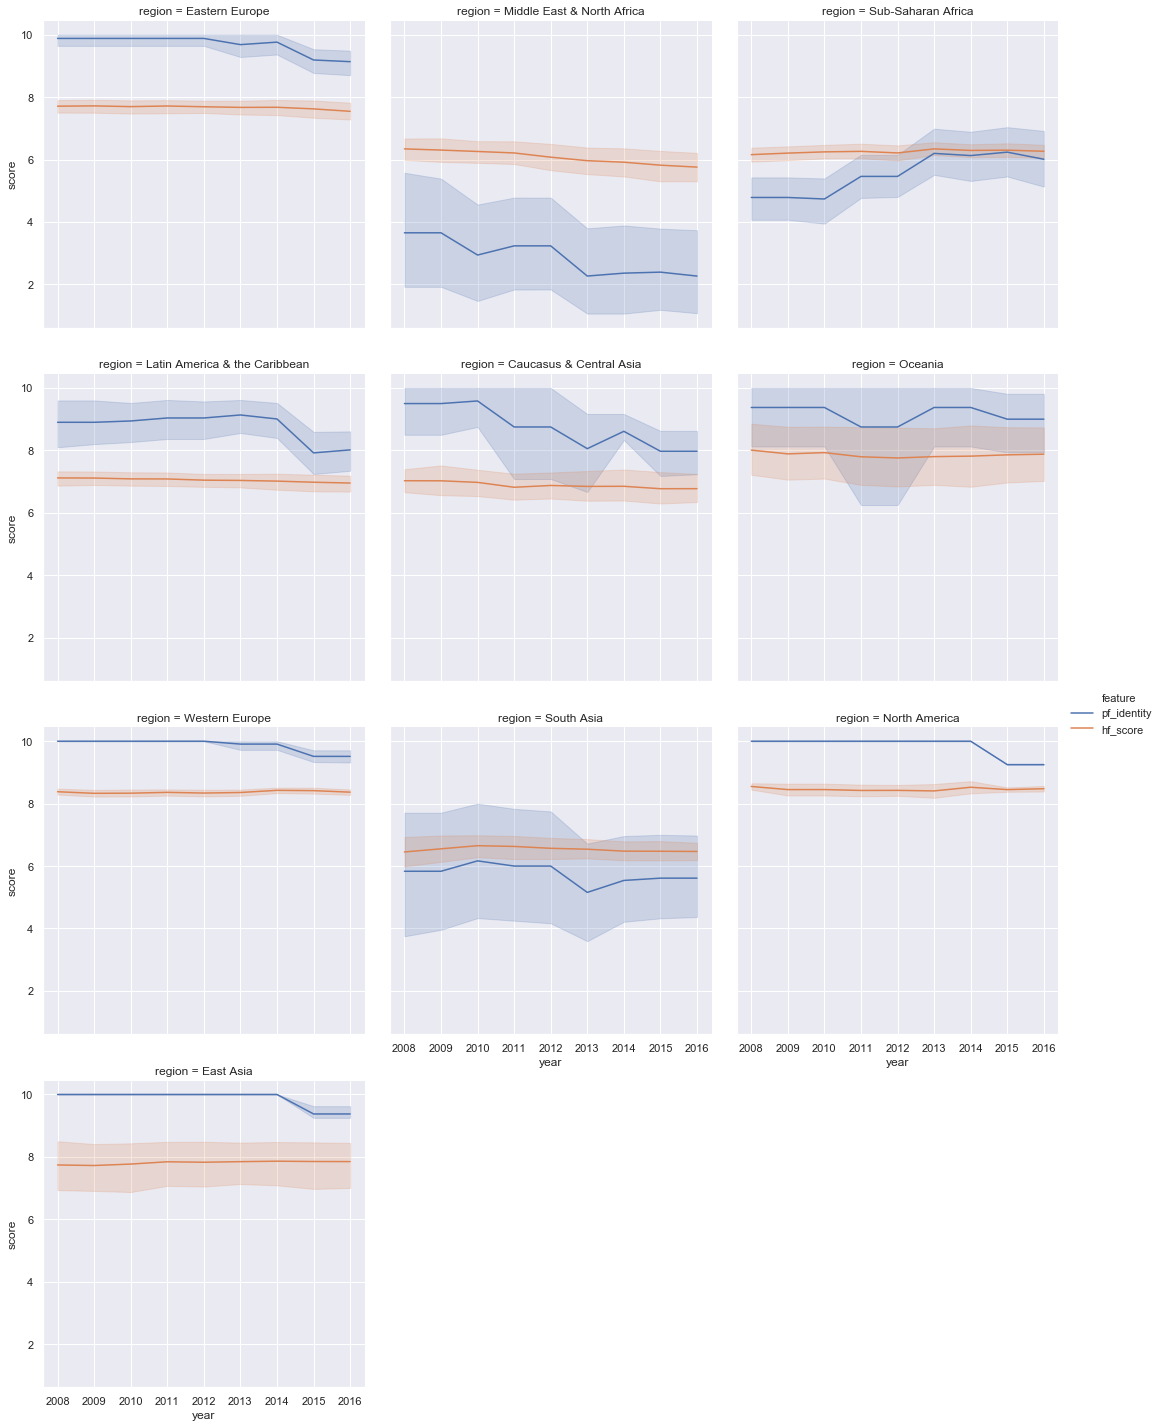

In [364]:
g = sns.relplot(data=data_melt, kind='line', x='year', y='score', hue='feature', col='region', col_wrap=3)

### 3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ###
¿Cómo seleccionarion los países relevantes a esa tendencia?

Respecto a las tendencias podemos ver que en el *hf_score* latino america coincide bastante con la media mundial. Las mayores diferencias las encuentramos en *pf_identity* donde podemos ver una caida pronunciada a partir del año 2015.

Para poder obtener una vision mas detallada trataremos de ver cuales son los paises que mas contribuyen a dicha fluctuacion. Para eso calcularemos la variacion interanual y seleccionaremos los paises donde la variable haya bajado a partir de 2015.

In [365]:
# Visualizacion de todos los paises de Latinoamerica
#g = sns.relplot(data=data_melt[data_melt.is_latam], kind='line', x='year', y='score', hue='feature', col='countries', col_wrap=3)

In [81]:
data_sorted = data[data.is_latam].sort_values(by=['countries','year'])
data_sorted['var_identity'] = data_sorted.pf_identity - data_sorted.pf_identity.shift(1)

countries_dec_pf = data_sorted.query('year==2015 and var_identity<-1')[['year','countries','var_identity']]
countries_dec_pf

,year,countries,var_identity
182,2015,Brazil,-2.500000
193,2015,Chile,-1.666667
198,2015,Costa Rica,-2.291667
204,2015,Dominican Rep.,-2.500000
207,2015,El Salvador,-2.500000
219,2015,Guatemala,-2.083333
223,2015,Haiti,-2.291667
224,2015,Honduras,-2.500000
235,2015,Jamaica,-2.083333
270,2015,Nicaragua,-2.291667


In [79]:
filter = data_melt.countries.isin(countries_dec_pf.countries)

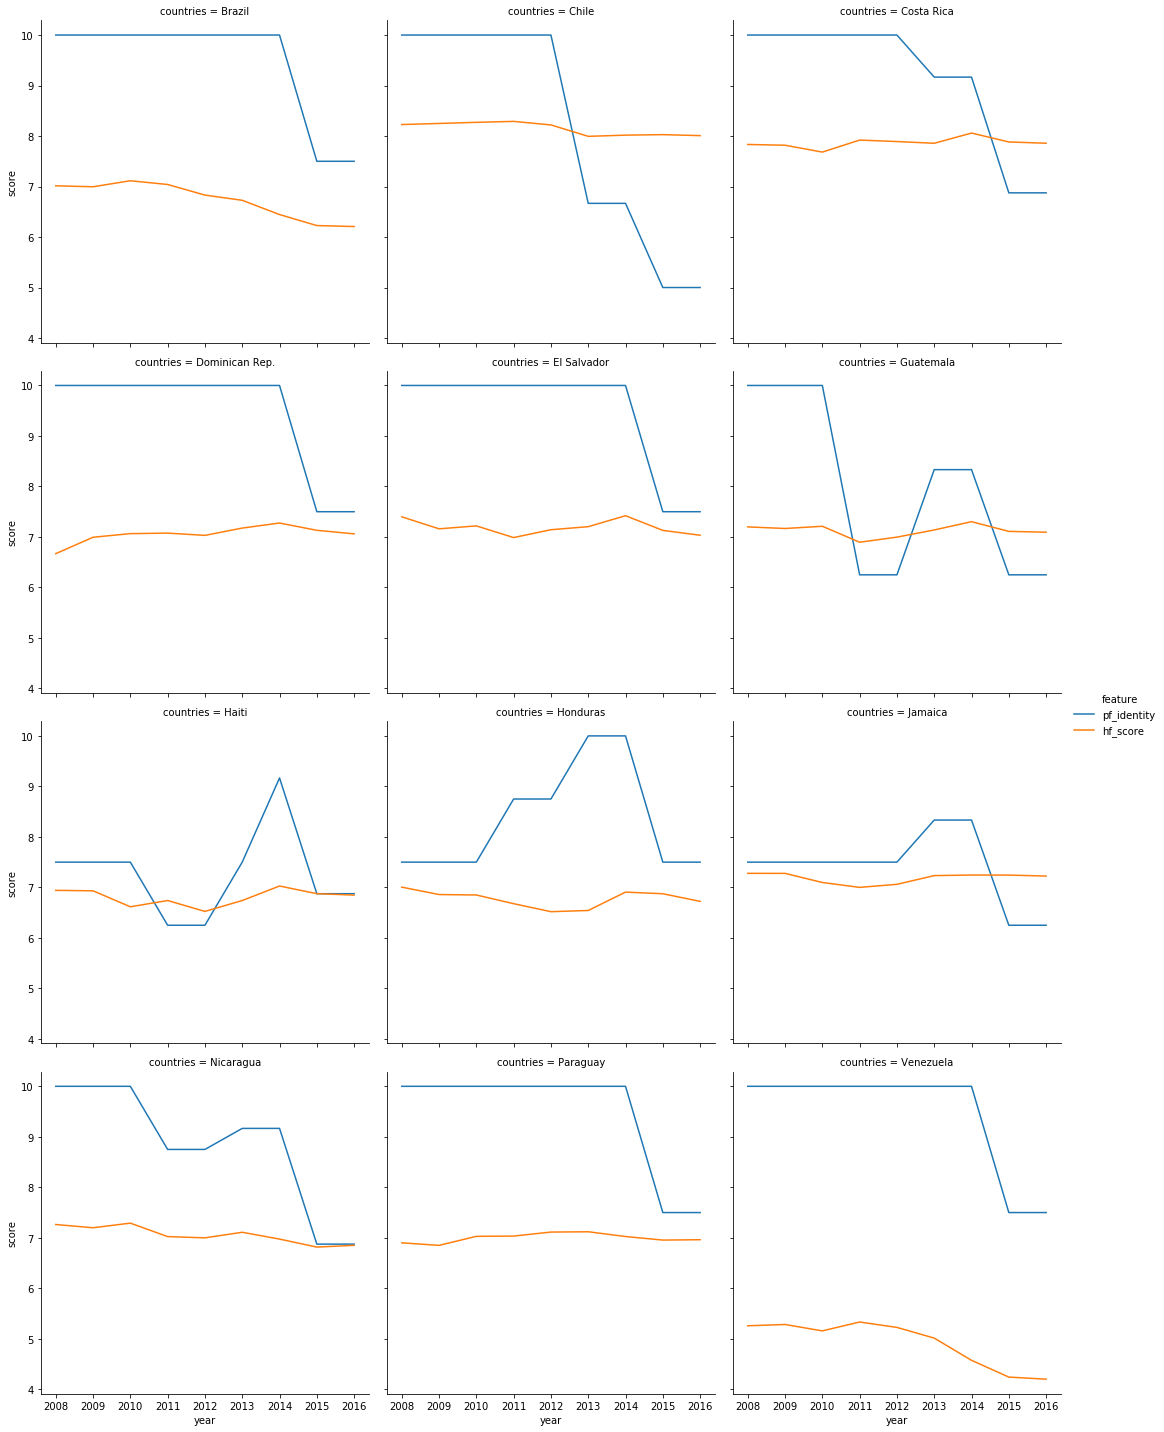

In [80]:
g = sns.relplot(data= data_melt[filter],
                kind='line', x='year', y='score', hue='feature', col='countries', col_wrap=3)

Aqui podemos ver claramente que en varios paises latinoamericanos se a dado una caida significativa de el indice de libertad indivial, habria que analizar cada pais individualmente para poder encontrar justificaciones de porque se ha dado este caso

## 2. Distribuciones
  

### 1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. ###
Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  

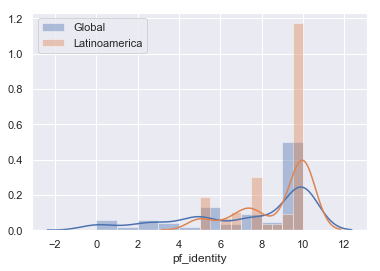

In [395]:
g = sns.distplot(data.pf_identity, bins=10, label='Global')
g = sns.distplot(data.pf_identity[data.is_latam], bins=10, label='Latinoamerica')
g = plt.legend()

En caso lo que podemos ver es que ambas distribuciones son altamentes simetricas, con una gran concentracion de valores alrededor del maximo de la escala. Inicialmente no parecen corresponderse a una distribucion normal.

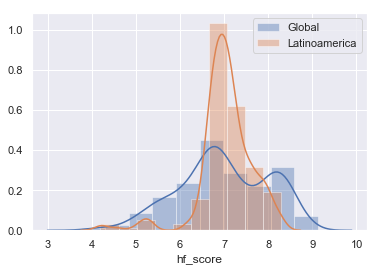

In [399]:
g = sns.distplot(data.hf_score, bins=10, label='Global')
g = sns.distplot(data.hf_score[data.is_latam], bins=10, label='Latinoamerica')
g = plt.legend()

Para esta variable vemos que en el caso global parece una superposicion de dos normales. Existen 2 maximos locales alrededor de aproximadamente 6.5 y 8.
Por otro lado en America Latina la distribucion parece mas normal, con una leve asimetrica hacia la izquierda.

Todos los valores parecen estar dentro del intervalo correcto por ende utilizamos toda la informacion disponible para graficar las distribuciones.

### 2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior ###
Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  

Para que la comparacion sea equivalente primero devemos normalizar nuestros datos para que tengas media = 0 y desviacion standard = 1

In [371]:
identity_norm = (data.pf_identity - data.pf_identity.mean()) / data.pf_identity.std()
hf_score_norm = (data.hf_score - data.hf_score.mean()) / data.hf_score.std()

identity_norm_latam = (data[data.is_latam].pf_identity - data[data.is_latam].pf_identity.mean()) / data[data.is_latam].pf_identity.std()
hf_score_norm_latam = (data[data.is_latam].pf_identity - data[data.is_latam].pf_identity.mean()) / data[data.is_latam].pf_identity.std()

Test de Kolmogorov-Smirnof, utilizaremos un nivel de significancia de 0.05 (95% de certeza)

In [83]:
ss.kstest(np.array(data.pf_identity),'norm')

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

In [373]:
ss.kstest(np.array(identity_norm_latam),'norm')

KstestResult(statistic=0.35088781204626546, pvalue=0.0)

In [374]:
ss.kstest(np.array(hf_score_norm),'norm')

KstestResult(statistic=0.06597824906177652, pvalue=1.1677888753114374e-05)

In [375]:
ss.kstest(np.array(identity_norm_latam),'norm')

KstestResult(statistic=0.35088781204626546, pvalue=0.0)

Como podemos observar en ninguno de los casos los p-values alcanzan el nivel de significancia requerido, por lo tanto no podemos decir que las distribuciones sean normales.

### 3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  

In [100]:
def qqplot(x,y):
    percs = np.linspace(0,100,len(x))
    qn_x = np.percentile(x, percs)
    qn_y = np.percentile(y, percs)

    g = plt.scatter(qn_x,qn_y,alpha=0.5)

    lx = np.linspace(np.min((qn_x.min(),qn_y.min())), np.max((qn_x.max(),qn_y.max())))
    g = plt.plot(lx,lx, color="k", ls="--")
    
    return g

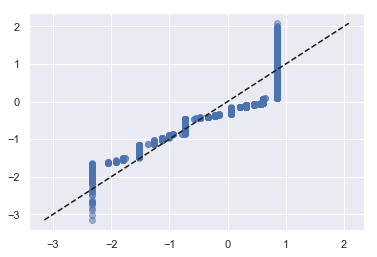

In [421]:
g = qqplot(identity_norm, hf_score_norm) 

Aqui podemos apreciar que existen diferencias grandes en los extremos de la distribucion con lo cual concluimos que no pertenecen a la misma distribucion.

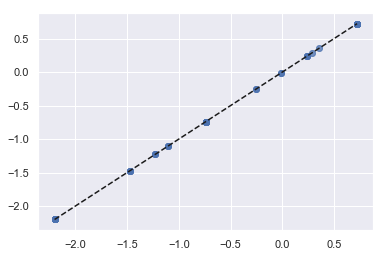

In [400]:
g = qqplot(identity_norm_latam, hf_score_norm_latam)

En este caso los valores coinciden sobre una recta a 45 grados, por lo que podemos inferir que ambos provienen de una misma distribucion

## otra opción de gráfico QQ

Estimamos los parámetros muestrales de las distribuciones con scipy 

In [109]:
# Estimamos los parámetros media y desvio estándar muestrales

identity_med, identity_desvio = ss.norm.fit(data.pf_identity)
hf_score_med, hf_score_desvio = ss.norm.fit(data.hf_score)

A partir de los parámetros creamos la curva normal 

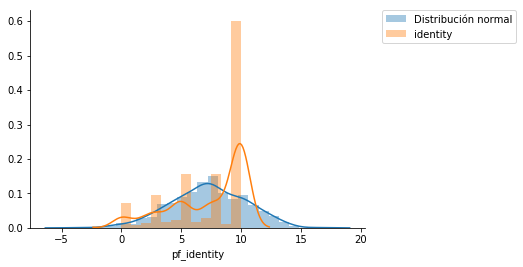

In [112]:
identity_norm_dist = ss.norm(identity_med, identity_desvio)
hf_score_norm_dist = ss.norm(hf_score_med, hf_score_desvio)

# Generamos una muestra
identity_sample = identity_norm_dist.rvs(1000)
# La graficamos
sns.distplot(identity_sample, label='Distribución normal')
sns.distplot(data.pf_identity, label='identity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

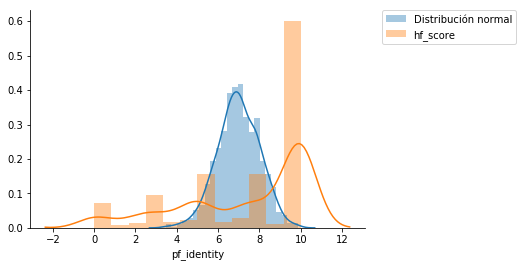

In [113]:
# repetimos el análisis para la otra variable

# Generamos una muestra
hf_score_sample = hf_score_norm_dist.rvs(1000)
# La graficamos
sns.distplot(hf_score_sample, label='Distribución normal')
sns.distplot(data.pf_identity, label='hf_score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

A partir de la curva de distribución normal con media y desvio iguales a los de la muestra hacemos el gráfico qq para la variable pf_identity

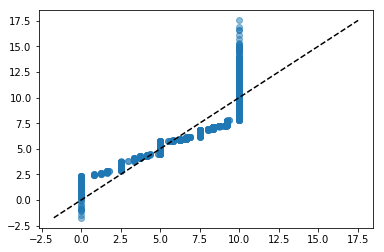

In [108]:
g = qqplot(data.pf_identity, identity_norm_dist.rvs(len(data.pf_identity))) 

En este gráfico se podemos confirmar que la variable pf_identity no tiene una distribución nomral.

A continución realizamos el gráfico qq para variable hf_score

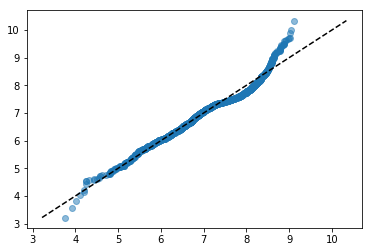

In [111]:
g = qqplot(data.hf_score, hf_score_norm_dist.rvs(len(data.hf_score))) 

Se observa que el comportamiento de esta variable no puede considerarse tampoco como normal por el alejamiento observado en los extremos del gráfico qq

4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [438]:
sk_id = ss.skew(identity_norm)
sk_hf = ss.skew(hf_score_norm)
sk_id_lam = ss.skew(identity_norm_latam)
sk_hf_lam = ss.skew(hf_score_norm_latam)

In [444]:
pd.DataFrame([[sk_id,sk_hf,sk_id_lam,sk_hf_lam]], columns=['Identity Global','Freedom Global','Identity Latam','Freedom Latam'], index=['Skew'])

,Identity Global,Freedom Global,Identity Latam,Freedom Latam
Skew,-0.912178,-0.212052,-1.047844,-1.047844


## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

### 1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

In [458]:
features = ['pf_identity','pf_score','ef_score']

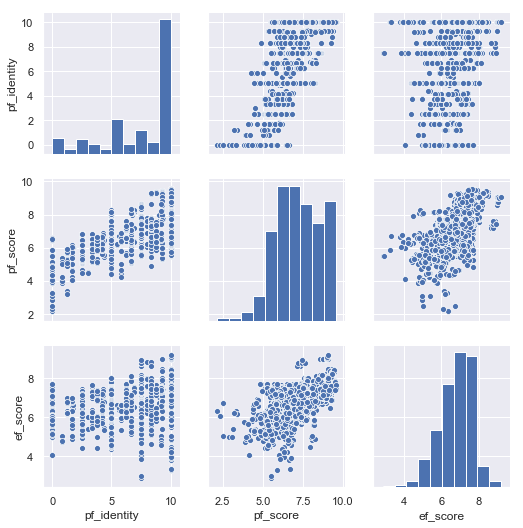

In [464]:
g = sns.pairplot(data[features])

### 2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? ###
Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

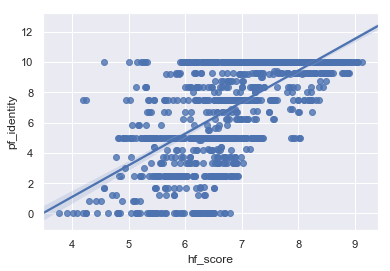

In [480]:
g = sns.regplot(data=data, x='hf_score',y='pf_identity')
#g = sns.regplot(data=data, y='hf_score',x='pf_identity')

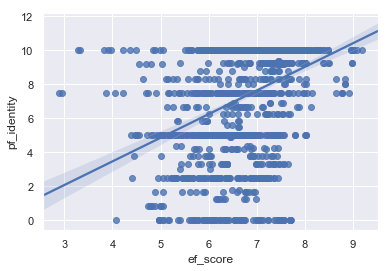

In [479]:
g = sns.regplot(data=data, x='ef_score',y='pf_identity')
#g = sns.regplot(data=data, y='ef_score',x='pf_identity')

### 3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo.
Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 

En los apartados anteriores hemos establecido que las distribuciones no son normales por lo tanto no podemos utilizar medidas de relacion parametricas como el coeficiente de Pearson, en su lugar utilizaremos el coeficiente de correlacion de Spearman y la Tau de Kendall.

In [482]:
ss.spearmanr(identity_norm,hf_score_norm)

SpearmanrResult(correlation=0.6861094212039192, pvalue=2.3804640834918467e-192)

In [483]:
ss.kendalltau(identity_norm,hf_score_norm)

KendalltauResult(correlation=0.5213095523555771, pvalue=3.65763160993025e-157)

4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es categorica, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)

In [516]:
hf_by_region = data.groupby(['region']).mean()['hf_score'].sort_values(ascending=False)
hf_by_region

region
North America                    8.461915
Western Europe                   8.368293
Oceania                          7.858762
East Asia                        7.813020
Eastern Europe                   7.671637
Latin America & the Caribbean    7.047982
Caucasus & Central Asia          6.879506
South Asia                       6.533740
Sub-Saharan Africa               6.256850
Middle East & North Africa       6.051464
Name: hf_score, dtype: float64

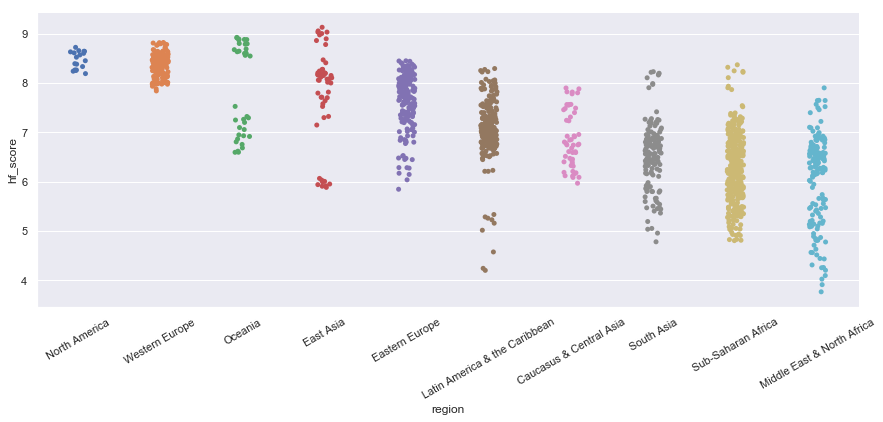

In [517]:
g = sns.catplot(data=data, x = 'region', y='hf_score', order= hf_by_region.index, aspect=2.5)
g.set_xticklabels(rotation=30)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


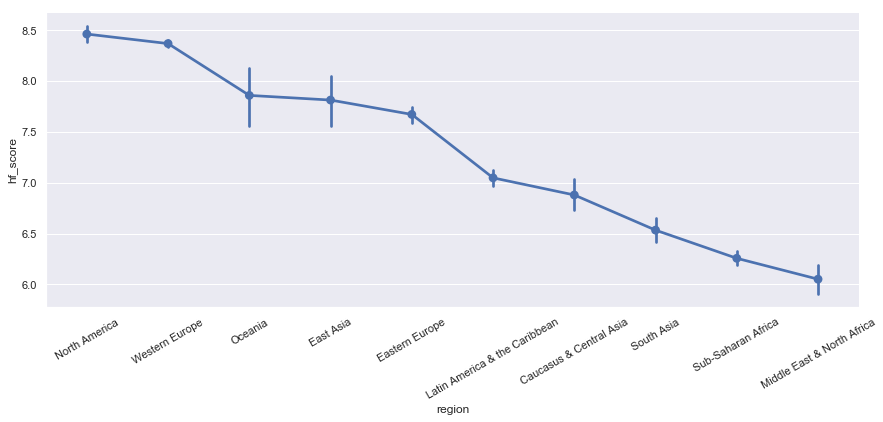

In [518]:
g = sns.catplot(data=data, kind='point', x = 'region', y='hf_score',order= hf_by_region.index, aspect=2.5)
g = g.set_xticklabels(rotation=30)

A continuacion hay que plantear una hipotesis y testearla. Hay que utilizar un test que no exija normalidad.